In [34]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly as py
import plotly.io
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

from plotly.offline import  download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)
cf.go_offline()

### INFO

I'm using interactive regime which compiles in 1st cell, but for GitHib pull I switch render to 'svg'

In [35]:
py.io.renderers.default = 'jpg'
py.io.renderers

Renderers configuration
-----------------------
    Default renderer: 'jpg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

# .iplot()

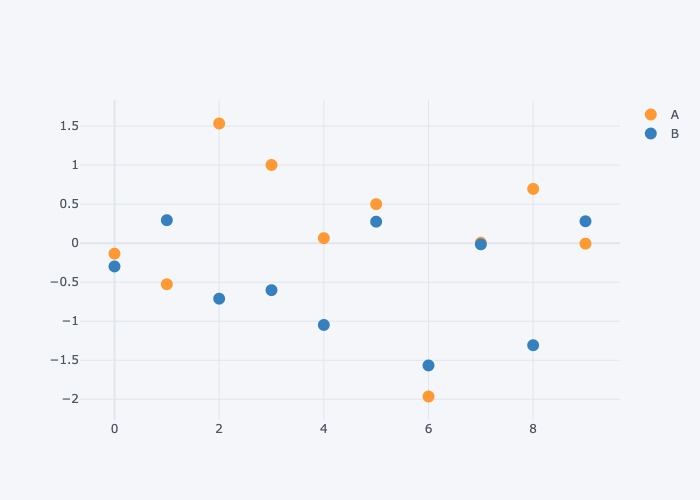

In [36]:
arr_1 = np.random.randn(10,2)
df_1 = pd.DataFrame(arr_1, columns = ['A','B'])
df_1.head()
df_1.iplot(
        kind = 'scatter',
        mode = 'markers'
        )

# GO

In [37]:
import plotly.graph_objects as go

In [38]:
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


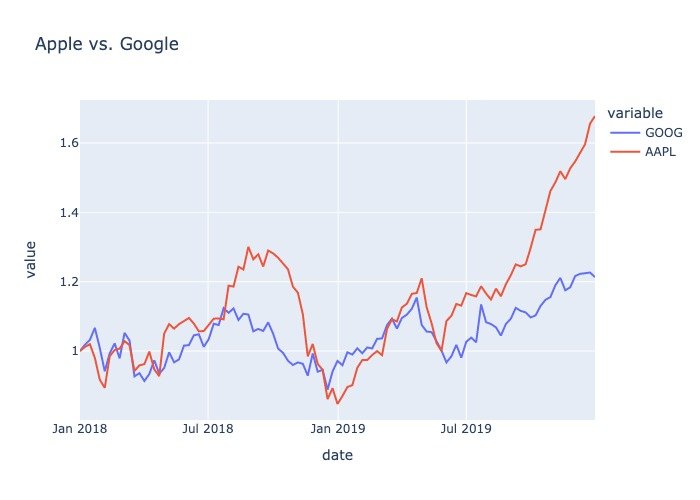

In [39]:
fig = px.line(
        df_stocks,
        x = 'date',
        y = ['GOOG', 'AAPL'],
        labels = {
            'x' : 'Date',
            'y' : 'Price'
            },
        title = 'Apple vs. Google',
        #width = 1600,
        #height = 500
        )

fig = fig.update_layout(
        autosize = True
        )

fig

In [40]:
def line_scatter(
        data: pd.Series,
        name: str,
        figure
        ):

    figure.add_trace(
            go.Scatter(
                    x = df_stocks.date,
                    y = data,
                    mode = 'lines+markers',
                    name= name
                    )
            )
    return figure

fig = go.Figure()

fig = line_scatter(
        data = df_stocks.AAPL,
        name = "Apple",
        figure = fig
        )
fig = line_scatter(
        data = df_stocks.AMZN,
        name = "Amazon",
        figure = fig
        )

fig = fig.add_trace(
        go.Scatter(
                x = df_stocks.date,
                y = df_stocks.GOOG,
                mode = 'lines',
                name = 'Google',
                line = dict(
                        color = 'purple',
                        width = 3,
                        dash = 'dashdot'
                        )
                )
        )

def font_config(
        size: int
        ) -> dict:

    temp_config = dict(
        family = 'Arial',
        size = size,
        color = 'black',
        )

    return temp_config


x_axis_config = dict(
        showline = False,
        showgrid = True,
        showticklabels = True,
        linecolor = 'white',
        linewidth = 1,
        ticks = 'outside',
        tickfont = font_config(size = 18)
        )

y_axis_config = dict(
        showline = False,
        showgrid = True,
        showticklabels = True,
        linecolor = 'white',
        linewidth = 1,
        ticks = 'outside',
        tickfont = font_config(size = 18)
        )

margin_config = dict(
        autoexpand = True,
        l = 200,
        r = 20,
        t = 80,
        b = 20
        )

legend_config = dict(
        font = font_config(18)
        )

fig = fig.update_layout(
        title = 'Stock price data 2018-2020',

        xaxis_title = 'DATE',
        yaxis_title = 'PRICE',

        legend_title = 'Compony names',
        legend = legend_config,

        font = font_config(size = 32),

        xaxis = x_axis_config,
        yaxis = y_axis_config,

        autosize = True,
        width = 1700,
        height = 600,

        #margin = margin_config,
        showlegend = True,
        #plot_bgcolor = 'snow'
        )

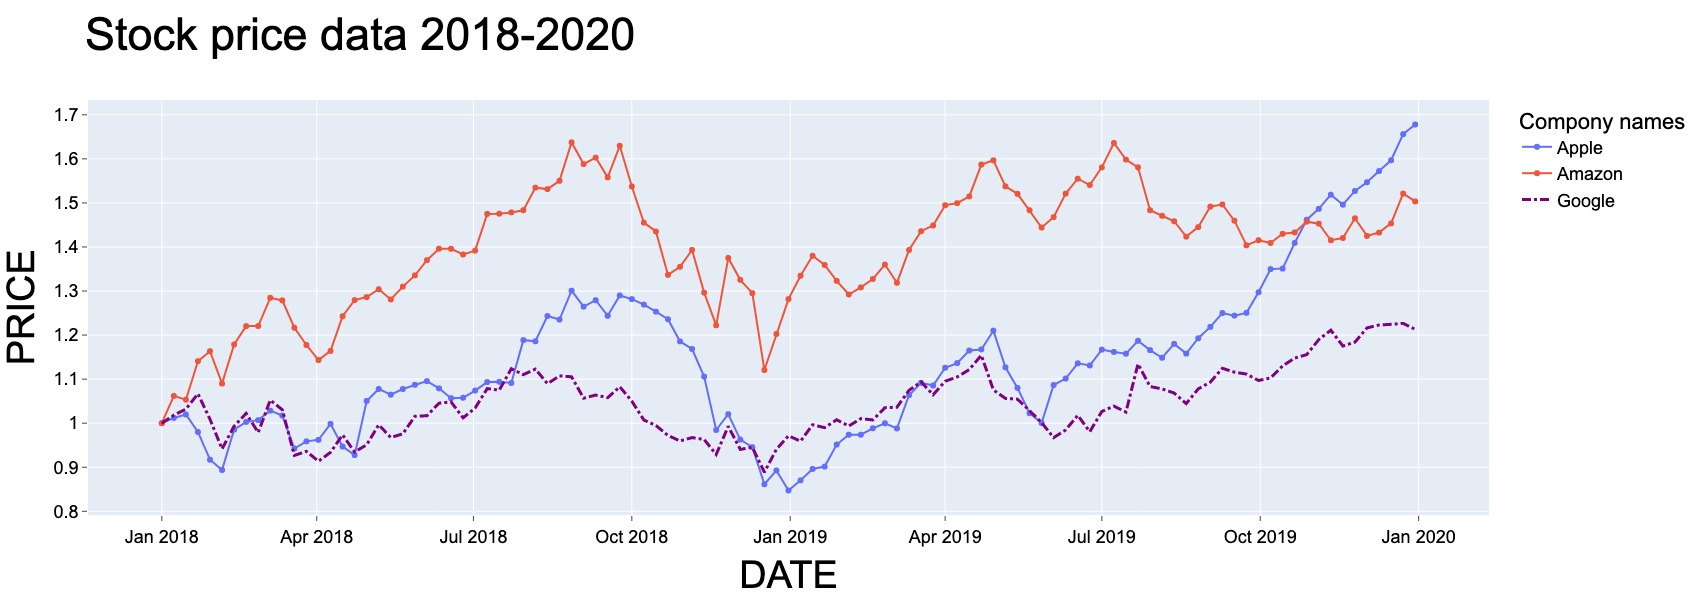

In [41]:
fig.show()

# Scatter plots

In [42]:
df_iris: pd.DataFrame = px.data.iris()

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


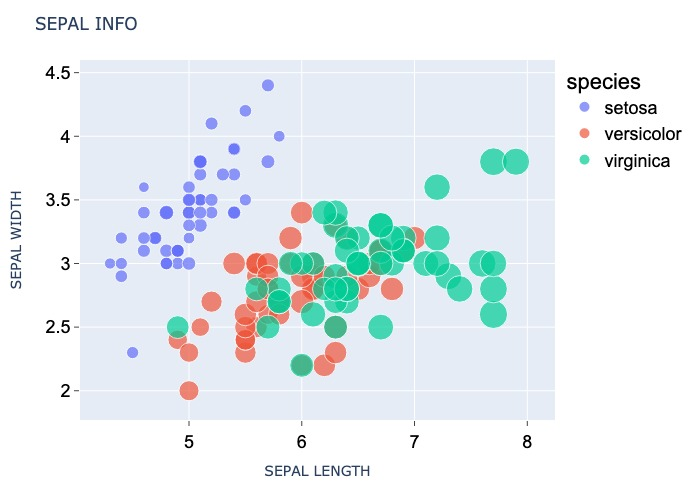

In [43]:
fig = px.scatter(
        data_frame = df_iris,
        x = 'sepal_length',
        y = 'sepal_width',
        color = 'species',
        size = 'petal_length',
        hover_data = ['petal_width'],
        labels = {
                'sepal_width' :  'SEPAL WIDTH',
                'sepal_length': 'SEPAL LENGTH'
	        }
        )

fig.update_layout(
        autosize = True,
        title = 'SEPAL INFO',

        xaxis = x_axis_config,
        yaxis = y_axis_config,

        legend = legend_config
        )

### Write to HTML

In [44]:
# py.io.write_html(
#         file = 'datab/sepal_info.html',
#         fig = fig
#         )

# GO scatter

In [45]:
fig = go.Figure()
fig = fig.add_trace(
        go.Scatter(
                x = df_iris.sepal_length,
                y = df_iris.sepal_width,
                mode = 'markers',
                marker_color = df_iris.petal_width,
                text = df_iris.species,
                marker = dict(showscale = True, symbol = df_iris.species_id),
                )

        )

fig.update_traces(
        marker_line_width = 1,
        marker_size = 14,
        )
fig = fig.update_layout(
        autosize = False,

        title = 'SEPAL INFO',
        xaxis_title = 'SEPAL LENGTH',
        yaxis_title = 'SEPAL WIDTH',

        font = font_config(size = 16),

        xaxis = x_axis_config,
        yaxis = y_axis_config,
        )

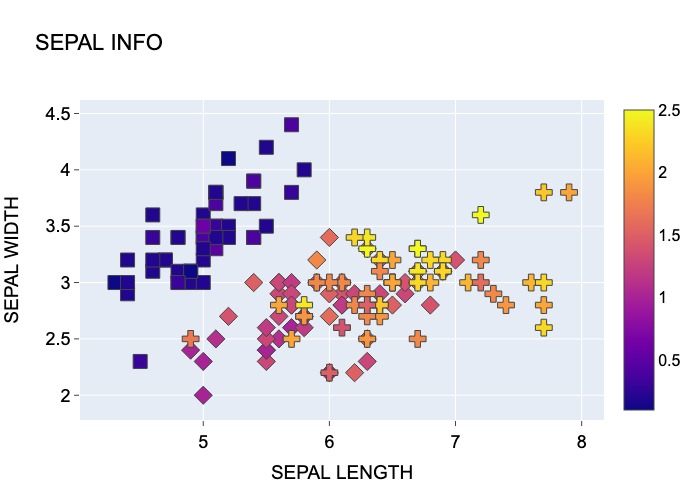

In [46]:
fig.show()

# Better stronger bigger

In [47]:
group_1 = df_iris.query('species_id == 1')
group_2 = df_iris.query('species_id == 2')
group_3 = df_iris.query('species_id == 3')

In [48]:
def add_trace(
        df: pd.DataFrame,
        fig,
        ):

        fig = fig.add_trace(
                go.Scatter(
                        x = df.sepal_length,
                        y = df.sepal_width,
                        mode = 'markers',
                        legendgroup="group",  # this can be any string, not just "group"
                        name= df.species.iloc[0],
                        marker_color = df.petal_width,
                        text = df.species,
                        marker = dict(
                                symbol = df.species_id
                                ),
                        )
                )

        return fig

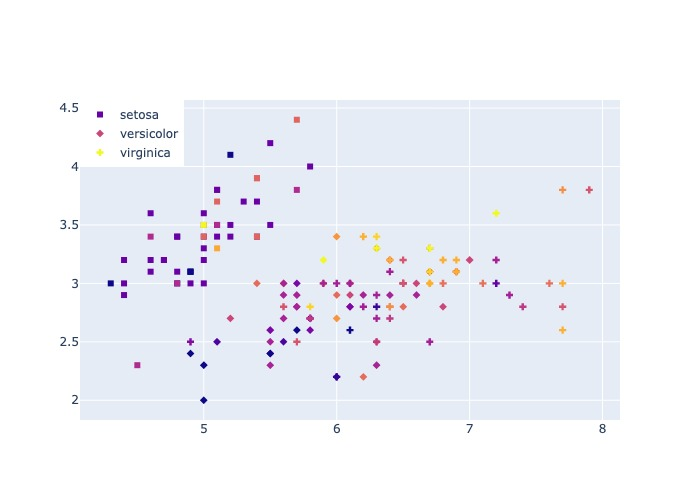

In [49]:
fig = go.Figure()

fig = add_trace(
        fig = fig,
        df = group_1
        )

fig = add_trace(
        fig = fig,
        df = group_2
        )

fig = add_trace(
        fig = fig,
        df = group_3
        )

fig.update_layout(
        legend=dict(
                x=0,
                y=1
                ),
        autosize = True,
        )


fig.show()

# GO scatterGL big data

In [50]:
NUM = 1_000
def create_pos_arr(
        amount_of_data: int = NUM
        ):

    data_arr = np.random.randn(NUM)
    data_arr = np.abs(data_arr)
    return data_arr

x_arr = create_pos_arr()
y_arr = create_pos_arr()
color_arr = create_pos_arr()

marker_config = dict(
        color = color_arr,
        colorscale = 'magma',
        line_width = 2,
        showscale = True
        )

fig = go.Figure(
        data = go.Scattergl(
                x = x_arr,
                y = y_arr,
                mode = 'markers',
                marker = marker_config
                )
        )

fig = fig.update_layout(
        autosize = True,

        title = 'Random distribution',
        xaxis_title = 'X AXIS',
        yaxis_title = 'Y AXIS',

        font = font_config(size = 16),

        width = 800,
        height = 800,

        xaxis = x_axis_config,
        yaxis = y_axis_config,

        )

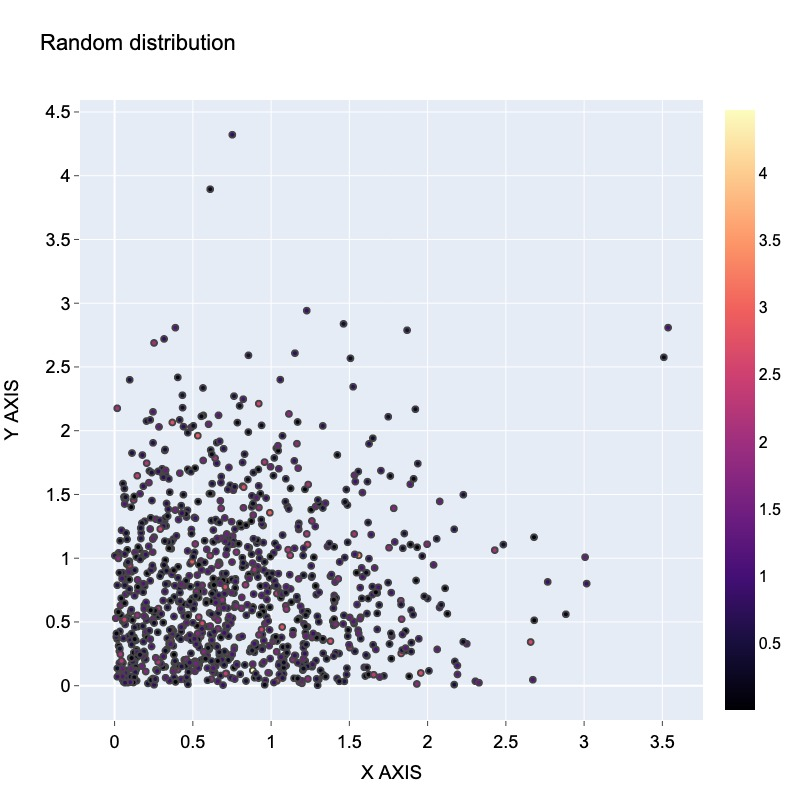

In [51]:
fig.show()